## This notebook creates the ordination plots in Figures 2B and Supplemental Figure S6.

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(grid)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


In [2]:
ps = readRDS(file="CHTC/Dada2_Results_OA20_PEAR_Full/ps.fungi")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5938 taxa and 101 samples ]
sample_data() Sample Data:       [ 101 samples by 103 sample variables ]
tax_table()   Taxonomy Table:    [ 5938 taxa by 16 taxonomic ranks ]

In [3]:
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
ps.hell = transform_sample_counts(ps, function(x) (x / sum(x))^0.5)
# Hellinger Transformation: "Particularly suited to species abundance data, 
    # this transformation gives low weights to variables with low counts and many zeros. 
    # The transformation itself comprises dividing each value in a data matrix by its row sum, 
    # and taking the square root of the quotient.

In [4]:
# We will be working with the Hellinger-transformed data
ps.plot = ps.hell

In [5]:
# Ordinating the data with Bray-Curtis dissimilarities and NMDS
dist = distance(ps.plot,method="bray")
ord = metaMDS(dist,k=3,trymax=1000)
ord.plot = data.frame(ord$points)

# Extracting the coordinates from the ordination
ord.plot = merge(ord.plot,sample_data(ps.plot), by = 0)

Run 0 stress 0.1405065 
Run 1 stress 0.1402691 
... New best solution
... Procrustes: rmse 0.01829114  max resid 0.1457311 
Run 2 stress 0.142633 
Run 3 stress 0.1402613 
... New best solution
... Procrustes: rmse 0.008821505  max resid 0.08338333 
Run 4 stress 0.140271 
... Procrustes: rmse 0.008722042  max resid 0.08271757 
Run 5 stress 0.1401788 
... New best solution
... Procrustes: rmse 0.02003028  max resid 0.1500812 
Run 6 stress 0.1401764 
... New best solution
... Procrustes: rmse 0.0005813355  max resid 0.003242601 
... Similar to previous best
Run 7 stress 0.140176 
... New best solution
... Procrustes: rmse 0.0007242075  max resid 0.002865653 
... Similar to previous best
Run 8 stress 0.1402685 
... Procrustes: rmse 0.01704925  max resid 0.1459279 
Run 9 stress 0.140179 
... Procrustes: rmse 0.0008407134  max resid 0.004100539 
... Similar to previous best
Run 10 stress 0.1403297 
... Procrustes: rmse 0.02051345  max resid 0.1505653 
Run 11 stress 0.1405054 
... Procrustes:

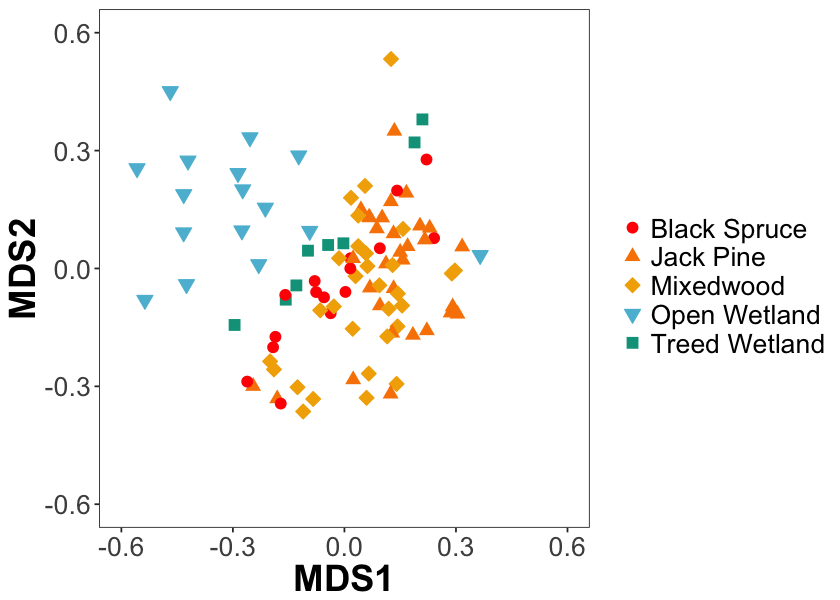

In [6]:
# Creating supplemental Figure 6

options(repr.plot.width=7, repr.plot.height=5)

p = ggplot(ord.plot,aes(x=MDS1, y=MDS2, color = Veg_Comm, shape = Veg_Comm, fill=Veg_Comm))
p = p  + geom_point(size=3)
p = p + scale_color_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_fill_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_shape_manual(values=c(16,17,23,25,15))
p = p + guides(color=guide_legend(title=""),fill=guide_legend(title=""),shape=guide_legend(title=""))
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))
p = p + ylim(-0.6,0.6)+xlim(-0.6,0.6)

p

Warning message:
“Removed 1 rows containing missing values (geom_point).”

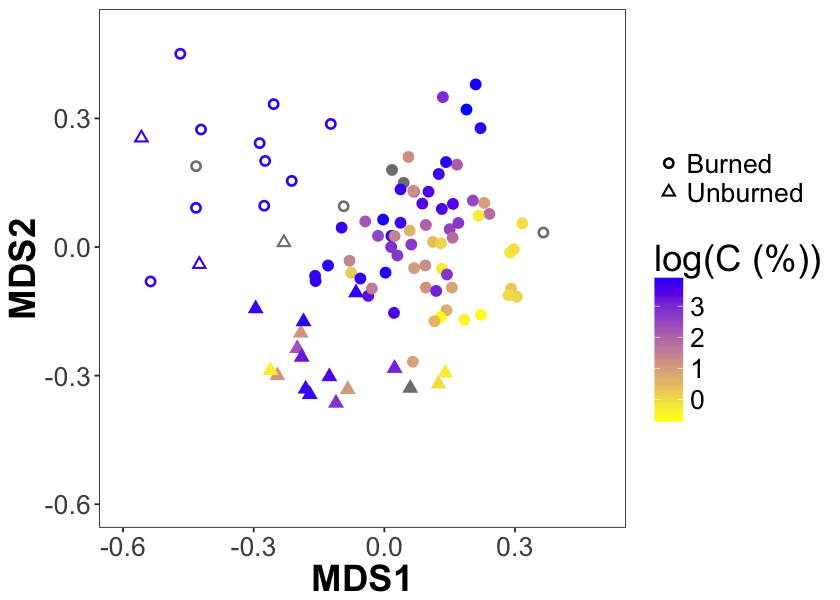

In [7]:
# Creating Figure 2B
options(repr.plot.width=7, repr.plot.height=5)

p = ggplot(ord.plot,aes(x=MDS1, y=MDS2, color = log(TC_pct), shape = Burned_Unburned))

p = p  + geom_point(size=3)
p = p + scale_colour_gradient(low="yellow",high="blue")

p = p + guides(color=guide_colorbar(title="log(C (%))"),shape=guide_legend(title=""))

wetlands = ord.plot%>%
    filter(Veg_Comm=="Open Wetland")
p = p + geom_point(data=wetlands, aes(x=MDS1,y=MDS2), color="white", size=1.5)

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))
p = p + ylim(-0.6,0.5)+xlim(-0.6,0.5)
p